<a href="https://colab.research.google.com/github/mpaulina24/Paulina/blob/main/Parcial4_MariaPaulina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

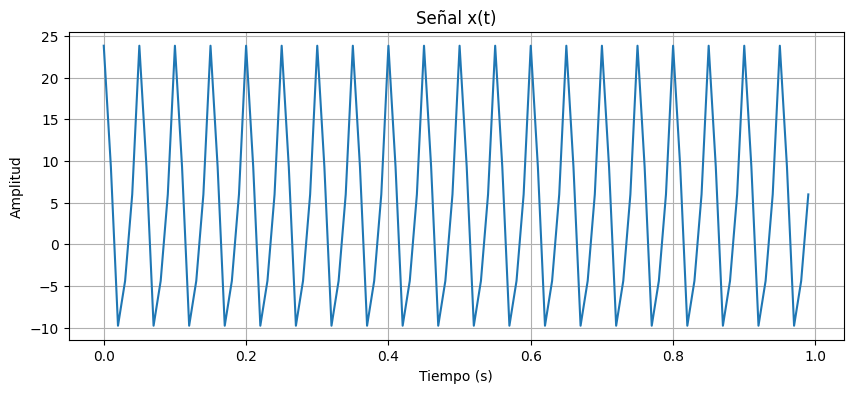

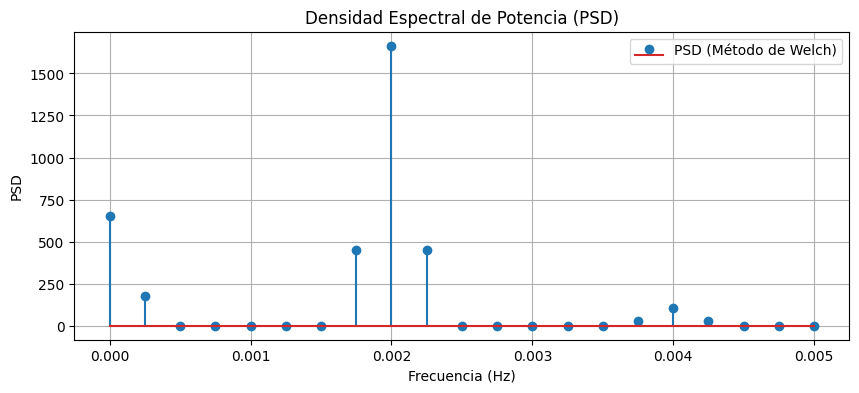

In [15]:
import numpy as np
import matplotlib.pyplot as plt

 # M: Número de muestras por segmento
 # S: Muestras de solapamiento

def periodograma(x, M, S, window_function=np.hanning):

    N = len(x)
    step = M - S  # Paso entre los segmentos
    K = (N - M) // step + 1  #Número de segmentos

    w = window_function(M) # Genero la ventana
    W = np.sum(w**2)  # Normalización de la ventana

    psd = np.zeros(M // 2 + 1)

# rreccorrer segmentos
    for k in range(K):
        start = k * step
        end = start + M
        segment = x[start:end]

        windowed_segment = segment * w

        fft_segment = np.fft.rfft(windowed_segment) #DTF por segmento

        Pk = (1 / W) * np.abs(fft_segment)**2 # Periodograma modificado

        psd += Pk

    psd /= K # Promediar los periodogramas

    # Frecuencias asociadas
    f = np.fft.rfftfreq(M, d=100)

    return f, psd

# Parámetros de la señal
# Cálculo para fs
# La máxima w es 80pi --> w = 2*pi*f --> f = w/2*pi --> f = 40Hz
# Para cumplir con el teorema de nyquist : fs > 80Hz
fs = 100 # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo (1 segundo)

# Señal dada
x = 4 * np.sin(80 * np.pi * t + np.pi / 4) + 16 * np.cos(40 * np.pi * t) + 5  # Señal x(t)

# Parámetros dados por el enunciado (Grupo de Juan Pablo)
M = 40
S = 25
window_function = np.hanning

f, psd = periodograma(x, M, S, window_function)

# Graficar señal dada
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title("Señal x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.stem(f, psd, label="PSD (Método de Welch)")
plt.title("Densidad Espectral de Potencia (PSD)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD")
plt.grid(True)
plt.legend()
plt.show()
